## **Importing libraries** ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from google.colab import files
# from google.colab import drive
import io
import pandas as pd
import seaborn as sns
import math
#import sklearn as sk

## **Uploading file** ##

In [5]:
# Read the CSV file with specified data types and low_memory=False
df = pd.read_csv('Spn_data_filtered_22_06_23.csv', low_memory=False)

In [6]:
df.head(5)

,UniqueID,StudySite,Name,Age,Sex,VPCVdose,PCV,Case Definition,Outcome,Serotype,Organism,Method,Source,District,Year
0,1100003225,DSH,nishat,2.0,Female,NaN,Not Appllicable,Pneumonia,Died,NaN,NaN,NaN,NaN,BAGERHAT,2018.0
1,1101983109,DSH,abid hasan,35.0,Male,NaN,No,Very sever disease,Discharged,NaN,NaN,NaN,NaN,BAGERHAT,2017.0
2,1100202319,DSH,Arman,118.0,Male,NaN,No,Not eligible,Discharged,NaN,S. aureus,Culture,Blood,BAGERHAT,2017.0
3,1100792219,DSH,Labib,1.0,Male,NaN,Not Appllicable,Very sever disease,Discharged,NaN,NaN,NaN,NaN,BAGERHAT,2018.0
4,1100665221,DSH,md. ahsan,0.0,Male,NaN,Not Appllicable,Very sever disease,Discharged,NaN,NaN,NaN,NaN,BAGERHAT,2018.0


### **Convert Year as floating to Int** ###

In [57]:
# Replace non-finite values (NaN) in the 'Year' column with 0
df['Year'] = df['Year'].fillna(0)
df['Age'] = df['Age'].fillna(0)

# Convert the 'Year' column to integer
df['Year'] = df['Year'].astype(int)


df['Age'] = df['Age'].astype(int)

In [58]:
print(df.head())

     UniqueID StudySite        Name  Age     Sex              PCV   
0  1100003225       DSH      nishat    2  Female  Not Appllicable  \
1  1101983109       DSH  abid hasan   35    Male               No   
2  1100202319       DSH       Arman  118    Male               No   
3  1100792219       DSH       Labib    1    Male  Not Appllicable   
4  1100665221       DSH   md. ahsan    0    Male  Not Appllicable   

      Case Definition     Outcome Serotype   Organism   Method Source   
0           Pneumonia        Died      NaN        NaN      NaN    NaN  \
1  Very sever disease  Discharged      NaN        NaN      NaN    NaN   
2        Not eligible  Discharged      NaN  S. aureus  Culture  Blood   
3  Very sever disease  Discharged      NaN        NaN      NaN    NaN   
4  Very sever disease  Discharged      NaN        NaN      NaN    NaN   

   District  Year  
0  BAGERHAT  2018  
1  BAGERHAT  2017  
2  BAGERHAT  2017  
3  BAGERHAT  2018  
4  BAGERHAT  2018  


### **Filtering dataframe for pneumoniae** ###

In [59]:
df = df.assign(pneumoniae=df['Organism']=='S. pneumoniae')
df.head(5)

,UniqueID,StudySite,Name,Age,Sex,PCV,Case Definition,Outcome,Serotype,Organism,Method,Source,District,Year,pneumoniae
0,1100003225,DSH,nishat,2,Female,Not Appllicable,Pneumonia,Died,NaN,NaN,NaN,NaN,BAGERHAT,2018,False
1,1101983109,DSH,abid hasan,35,Male,No,Very sever disease,Discharged,NaN,NaN,NaN,NaN,BAGERHAT,2017,False
2,1100202319,DSH,Arman,118,Male,No,Not eligible,Discharged,NaN,S. aureus,Culture,Blood,BAGERHAT,2017,False
3,1100792219,DSH,Labib,1,Male,Not Appllicable,Very sever disease,Discharged,NaN,NaN,NaN,NaN,BAGERHAT,2018,False
4,1100665221,DSH,md. ahsan,0,Male,Not Appllicable,Very sever disease,Discharged,NaN,NaN,NaN,NaN,BAGERHAT,2018,False


### **Convert True and False to 0/1** ###

In [60]:
df.pneumoniae = df.pneumoniae.replace({True: 1, False: 0})
df.head(5)

,UniqueID,StudySite,Name,Age,Sex,PCV,Case Definition,Outcome,Serotype,Organism,Method,Source,District,Year,pneumoniae
0,1100003225,DSH,nishat,2,Female,Not Appllicable,Pneumonia,Died,NaN,NaN,NaN,NaN,BAGERHAT,2018,0
1,1101983109,DSH,abid hasan,35,Male,No,Very sever disease,Discharged,NaN,NaN,NaN,NaN,BAGERHAT,2017,0
2,1100202319,DSH,Arman,118,Male,No,Not eligible,Discharged,NaN,S. aureus,Culture,Blood,BAGERHAT,2017,0
3,1100792219,DSH,Labib,1,Male,Not Appllicable,Very sever disease,Discharged,NaN,NaN,NaN,NaN,BAGERHAT,2018,0
4,1100665221,DSH,md. ahsan,0,Male,Not Appllicable,Very sever disease,Discharged,NaN,NaN,NaN,NaN,BAGERHAT,2018,0


### **Take only True column of pneumoniae column** ###

In [61]:
df.drop(df[df['pneumoniae'] == 0].index, inplace = True)
df.head(5)

,UniqueID,StudySite,Name,Age,Sex,PCV,Case Definition,Outcome,Serotype,Organism,Method,Source,District,Year,pneumoniae
61,1102351105,DSH,ARAFAT,55,Male,No,Very sever disease,Discharged,15B/C,S. pneumoniae,ICT,CSF,BAGERHAT,2017,1
235,2100616322,SSF,Mahin,9,Male,NaN,Not eligible,Discharged,NTD,S. pneumoniae,ICT,CSF,BARGUNA,2018,1
328,1100027111,DSH,mehtab,7,Female,NaN,Meningitis,Discharged,NoPCV13,S. pneumoniae,ICT,CSF,BARISAL,2019,1
568,1100397110,DSH,aminul islam,1,Male,NaN,Very sever disease,Discharged,19F,S. pneumoniae,PCR,CSF,BARISAL,2015,1
1328,1100844109,DSH,jaber,3,Male,No,Meningitis,Discharged,QNS,S. pneumoniae,ICT,CSF,BARISAL,2014,1


In [62]:
df.isnull().sum()

UniqueID             0
StudySite            0
Name                 0
Age                  0
Sex                  0
PCV                310
Case Definition      0
Outcome              1
Serotype            28
Organism             0
Method               0
Source               0
District           359
Year                 0
pneumoniae           0
dtype: int64

### **1. No of cases vs year plot** ###

In [63]:
plt.rcParams['figure.figsize'] = [40,20]

In [71]:
# Sort the DataFrame by the 'Year' column in ascending order
sorted_df = df.sort_values(by='Year', ascending=True)

# Count the occurrences of each year
year_counts = sorted_df['Year'].value_counts()

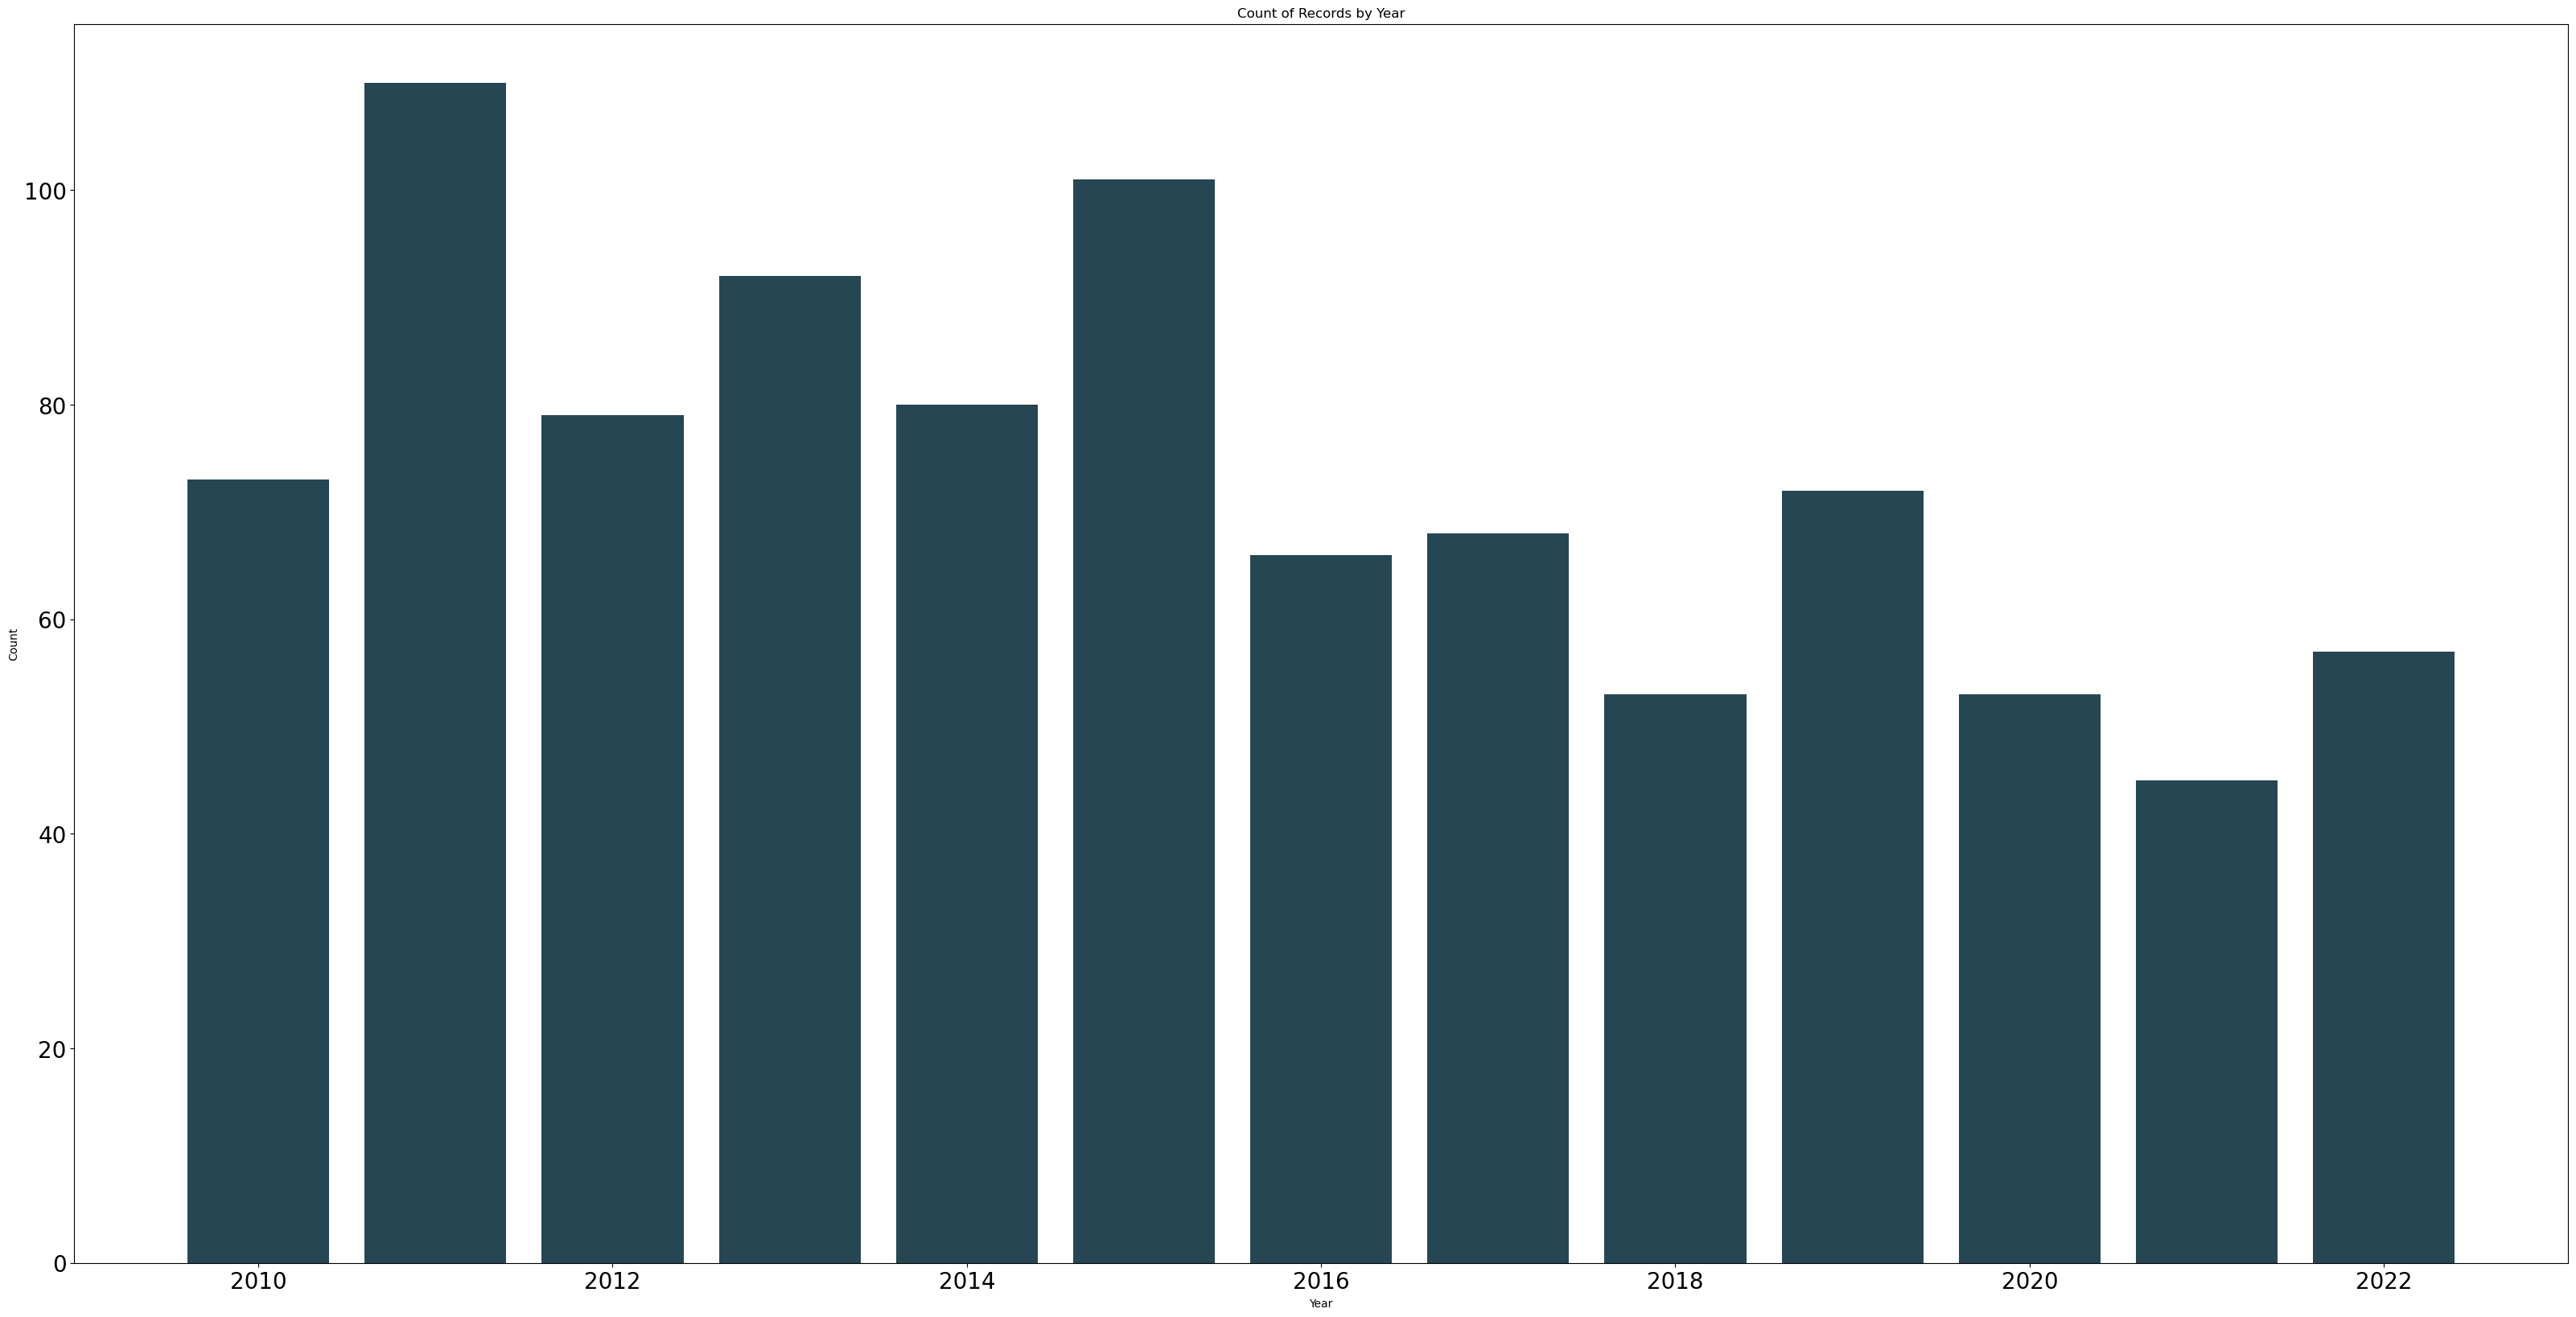

In [72]:
# Plot the value counts of 'Year' as a bar plot
plt.bar(year_counts.index, year_counts.values, color="#264653")

# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Records by Year')


# Rotate x-axis labels if needed
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


# Show the plot
plt.show()

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120')])

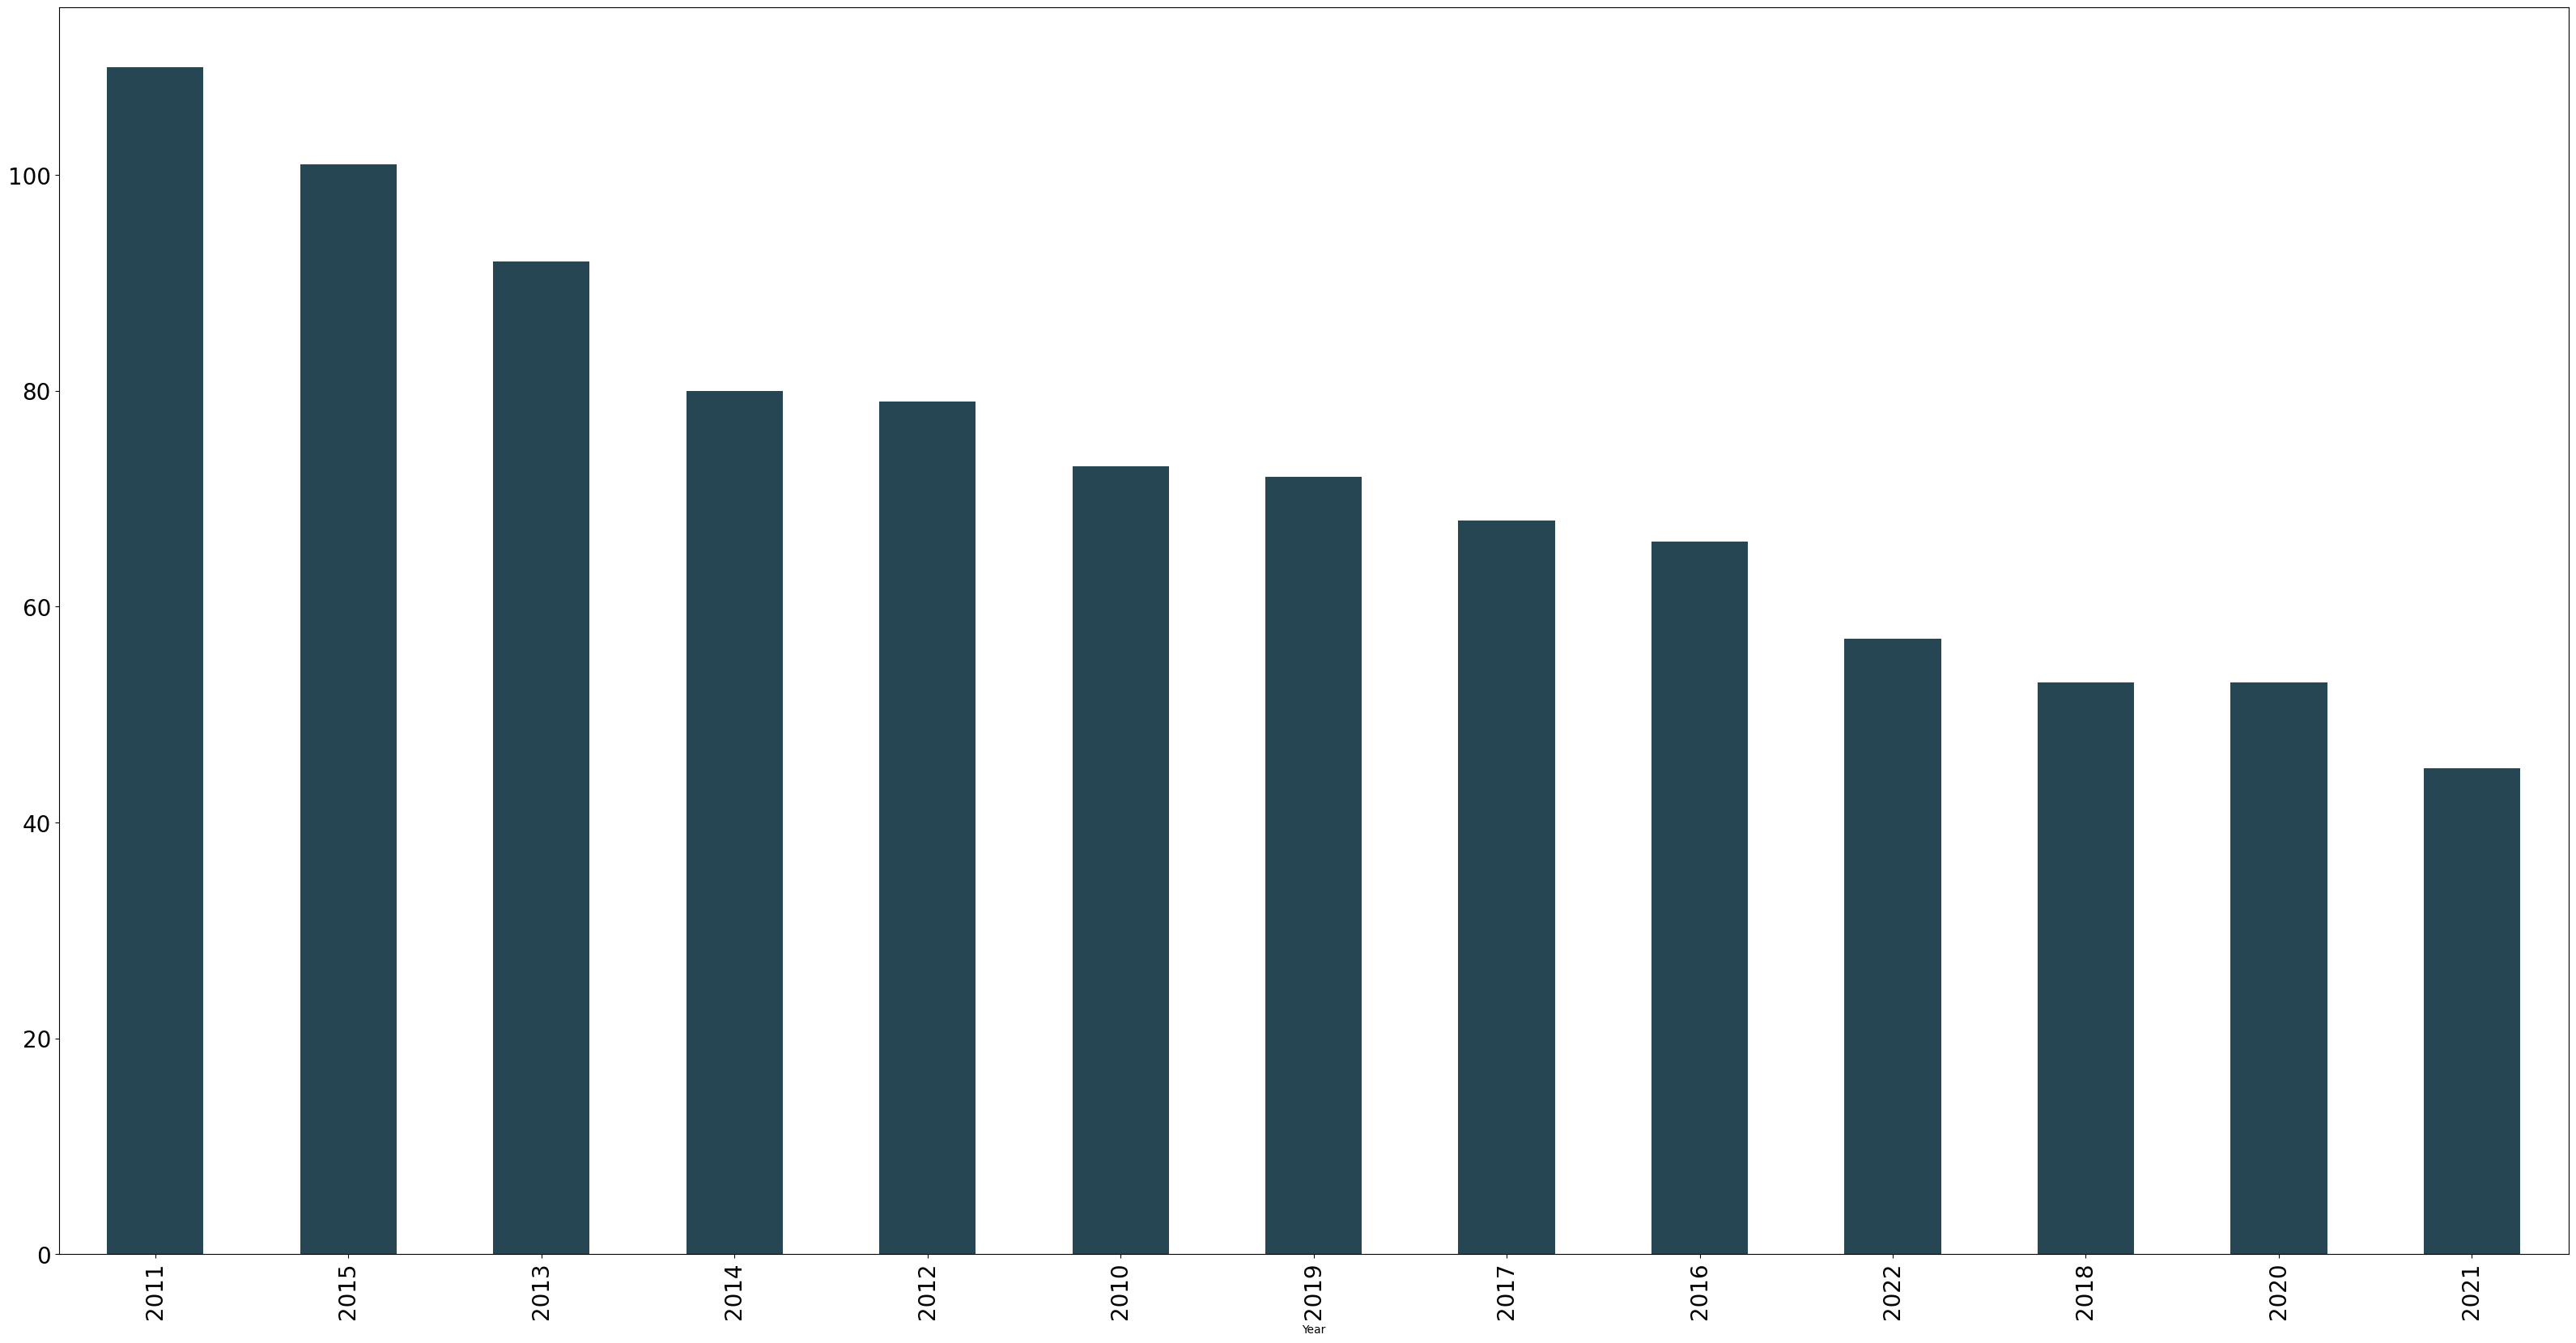

In [66]:
df['Year'].value_counts().plot(kind='bar',color="#264653")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xticks('Year', rotation=45, fontsize=25)
#plt.title("Serotype Distribution",fontsize=40,color="black")

In [ ]:
df['Year'].value_counts().sort_index().plot(kind='bar',color='#665191')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

**6. Age Distribution**

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80')])

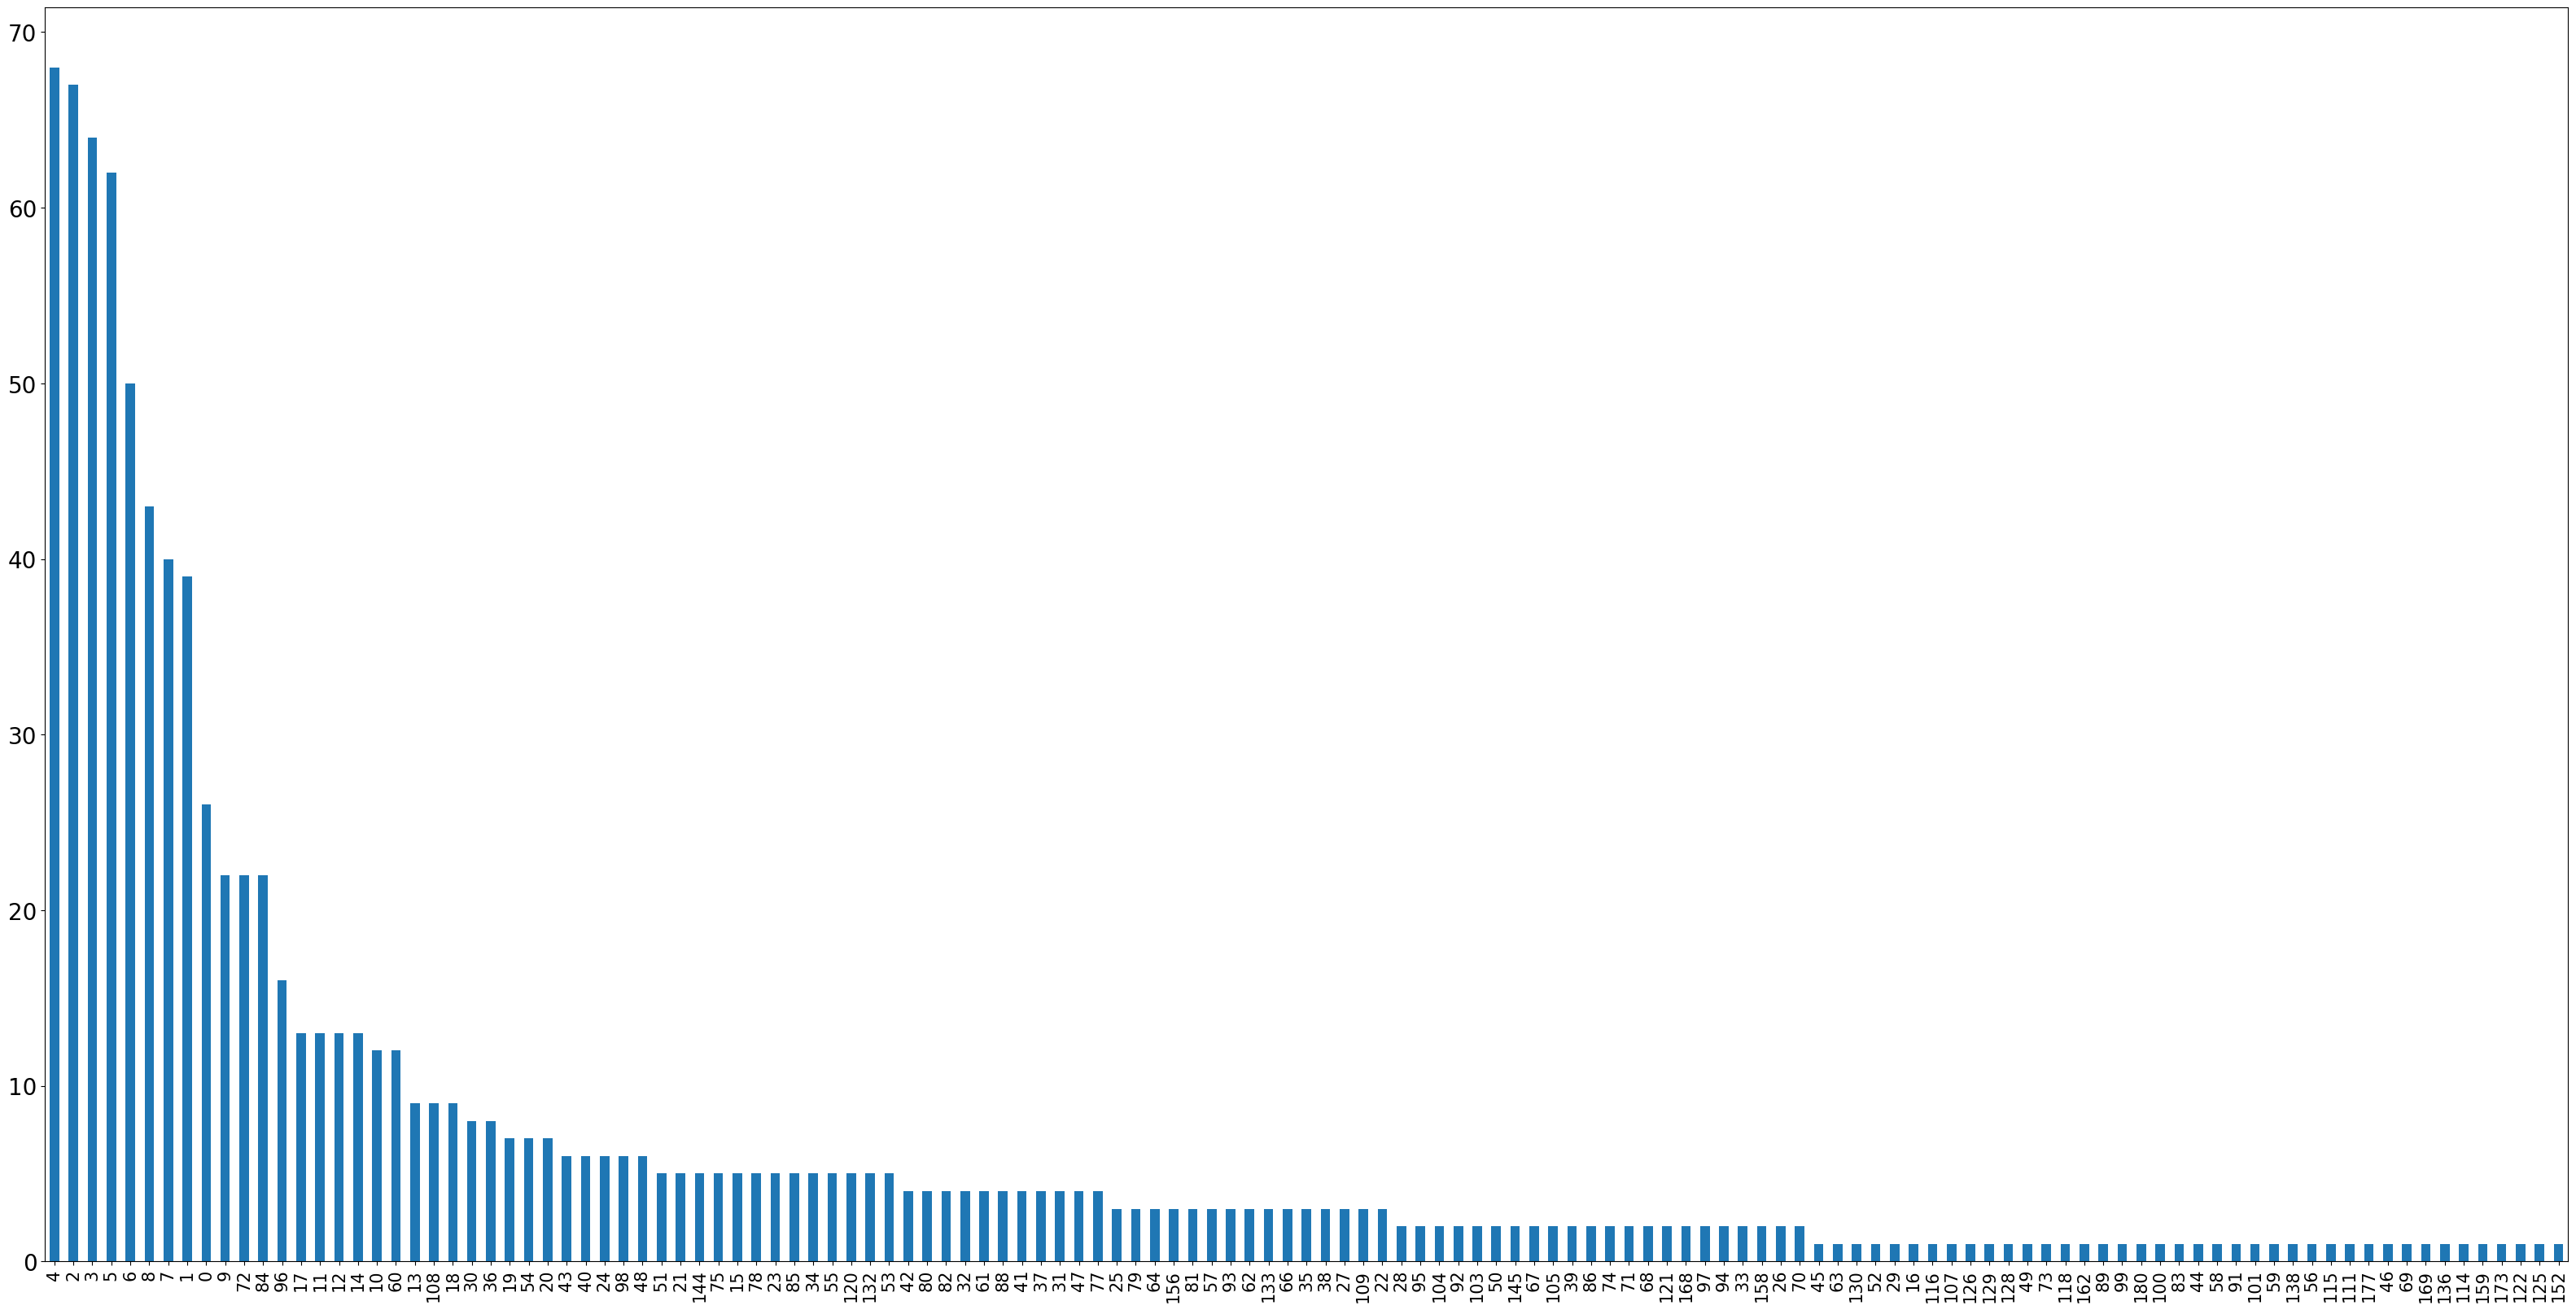

In [ ]:
df['Age'].value_counts().plot(kind='bar')
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=20)